In [1]:
import numpy as np
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [85]:
def load_trained_model():
    model_path = '../models/best_model.keras'
    model = load_model(model_path)
    print(f"Modelo carregado de '{model_path}'")
    return model

In [86]:
model = load_trained_model()

Modelo carregado de '../models/best_model.keras'


In [87]:
test_dir = '../data/processed/plantvillage dataset/test'

# Gerador de dados de teste
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Avaliando o modelo
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'\nAcurácia no Conjunto de Teste: {test_acc * 100:.2f}%')

# Fazendo previsões
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Gerando o relatório de classificação
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("\nRelatório de Classificação:\n", report)

Found 10773 images belonging to 37 classes.


c:\Users\DanielFilho\Documents\Code_Station\VScode\Doencas_em_plantas\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


337/337 - 112s - 332ms/step - accuracy: 0.9462 - loss: 0.1749

Acurácia no Conjunto de Teste: 94.62%
337/337 ━━━━━━━━━━━━━━━━━━━━ 89s 263ms/step

Relatório de Classificação:
                                              precision    recall  f1-score   support

                           Apple_Apple_scab       0.69      0.97      0.81       126
                            Apple_Black_rot       1.00      0.91      0.95       125
                     Apple_Cedar_apple_rust       0.93      0.96      0.95        55
                              Apple_healthy       0.97      0.88      0.93       329
                          Blueberry_healthy       0.98      0.96      0.97       301
                      Cherry_Powdery_mildew       0.96      0.98      0.97       211
                             Cherry_healthy       0.95      0.97      0.96       171
                          Corn_Common_rust_       0.99      0.97      0.98       239
                  Corn_Northern_Leaf_Blight       0.94     

In [88]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_new_image(img_path, model, class_labels):
    # Carregar a imagem
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Pré-processar a imagem
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalizar a imagem

    # Fazer a previsão
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Obter o rótulo da classe prevista
    predicted_label = class_labels[predicted_class[0]]

    labels = predicted_label.split('_')
    plt.imshow(img)
    plt.axis('off')

    
    if 'healthy' in labels:
        print(f"A classe prevista para imagem é '{labels[0]}'.")
        print(f"A planta na imagem é saudável.")
    else:
        print(f"A classe prevista para imagem é '{labels[0]}'.")
        if len(labels) > 2:
            print(f"A planta na imagem está doente. A doença prevista é '{labels[1]} {labels[2]}'.")
        else:
            print(f"A planta na imagem está doente. A doença prevista é '{labels[1]}'.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
A classe prevista para imagem é 'Apple'.
A planta na imagem é saudável.
Classe verdadeira: Apple


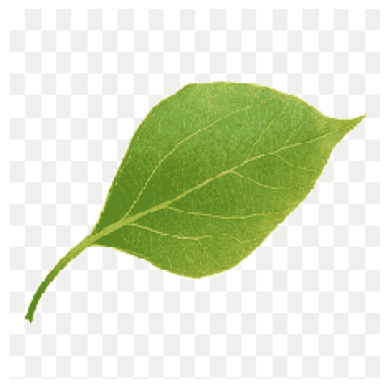

--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
A classe prevista para imagem é 'Blueberry'.
A planta na imagem é saudável.
Classe verdadeira: Blueberry


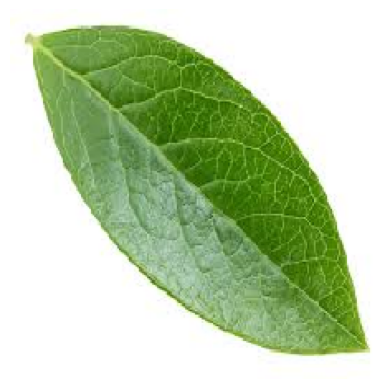

--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
A classe prevista para imagem é 'Corn'.
A planta na imagem está doente. A doença prevista é 'Common rust'.
Classe verdadeira: Corn


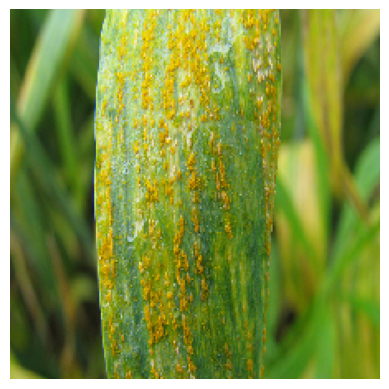

--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
A classe prevista para imagem é 'Grape'.
A planta na imagem é saudável.
Classe verdadeira: Grape


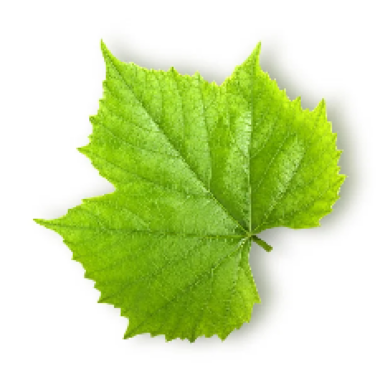

--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
A classe prevista para imagem é 'Orange'.
A planta na imagem está doente. A doença prevista é 'Citrus greening'.
Classe verdadeira: Orange


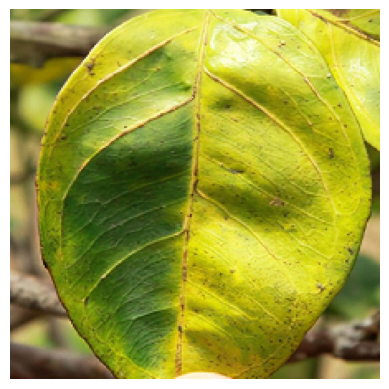

--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
A classe prevista para imagem é 'Tomato'.
A planta na imagem está doente. A doença prevista é 'Leaf Mold'.
Classe verdadeira: Tomato


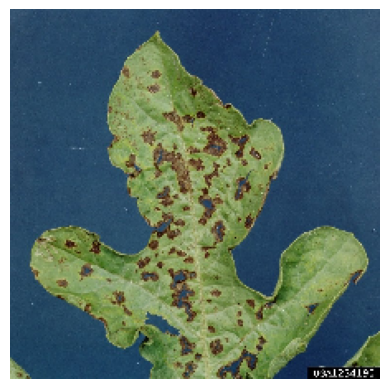

--------------------------------------------------


In [89]:
path_inferece = '../data/to_inferece'
for img in os.listdir(path_inferece):
    img_path = os.path.join(path_inferece, img)
    predict_new_image(img_path, model, class_labels)
    print(f"Classe verdadeira: {img.split('.')[0].title()}")
    plt.show()
    print('-'*50)